In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

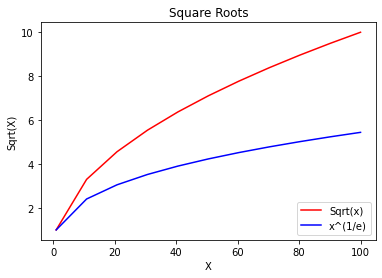

In [25]:
x = np.linspace(1, 100, 11)
y = [math.sqrt(i) for i in x]
y2 = x ** (1 / math.e)

plt.xlabel('X') 
plt.ylabel('Sqrt(X)')
plt.title('Square Roots')
           
plt.plot(x, 
         y, 
         color='r', 
         label='Sqrt(x)')

plt.plot(x, 
         y2, 
         color='b', 
         label=('x^(1/e)'))

plt.legend(loc='lower right')

In [18]:
df_heart = pd.read_csv('heart_failure_wNA.csv')
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,N,582.0,N,20.0,Y,265000.00,1.9,130,M,N,4.0,Y
1,55.0,N,NaN,N,38.0,N,263358.03,1.1,136,M,N,6.0,Y
2,65.0,N,146.0,NaN,20.0,N,162000.00,1.3,129,M,Y,7.0,Y
3,50.0,Y,111.0,N,20.0,N,210000.00,1.9,137,M,N,7.0,Y
4,65.0,Y,NaN,NaN,20.0,N,327000.00,2.7,116,F,N,8.0,Y


[8.0, 6.0]


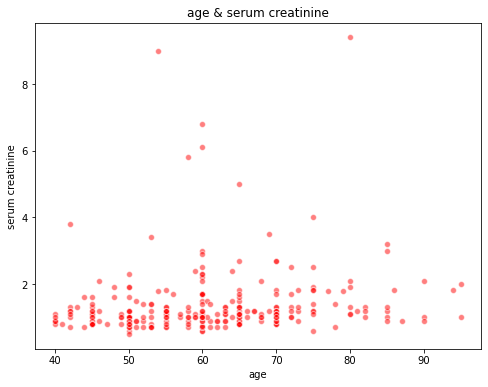

In [46]:
print(plt.rcParams['figure.figsize']) # ขนาดของกราฟ default [6.0, 4.0]
plt.rcParams['figure.figsize'] = [8.0 , 6.0] # เปลี่ยนขนาดเป็น [8.0, 6.0]

plt.xlabel('age')
plt.ylabel('serum creatinine')
plt.title('age & serum creatinine')

x = df_heart.age
y = df_heart.serum_creatinine
plt.scatter(x, 
            y, 
            color='r', # สีจุด
           edgecolor='w', # สีขอบของจุด
           s=35, # ขนาดจุด
           alpha=0.5) # ความจาง

DEATH_EVENT
Y    65.260077
N    58.790782
Name: age, dtype: float64


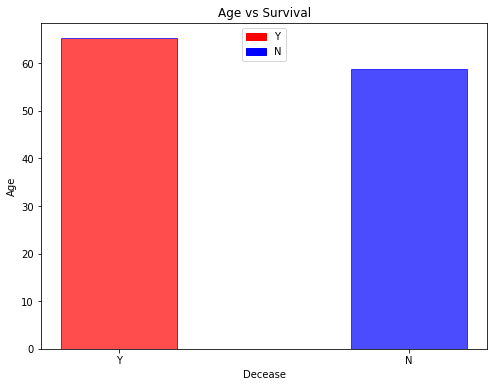

In [95]:
plt.xlabel('Decease')
plt.ylabel('Age')
plt.title('Age vs Survival')

x = df_heart.DEATH_EVENT.unique()
y = df_heart.groupby('DEATH_EVENT').age.mean()[x]
print(y)

plt.bar(x=x,
        height=y,
        width=0.4,
        align='center',
        color=['r', 'b'],
        edgecolor='b',
        alpha=0.7)

colors = {'Y': 'r', 'N': 'b'}
labels = x
handle = [
    plt.Rectangle(xy=(0, 0), width=1, height=1, color=colors[label]) for label in labels
]

plt.legend(handle, labels, loc='upper center')

(array([14., 20.,  6., 29., 17., 20., 14., 36., 15., 28., 32.,  6., 14.,
         3.,  8.,  3.,  7.,  1.,  3.,  3.]),
 array([40.  , 42.75, 45.5 , 48.25, 51.  , 53.75, 56.5 , 59.25, 62.  ,
        64.75, 67.5 , 70.25, 73.  , 75.75, 78.5 , 81.25, 84.  , 86.75,
        89.5 , 92.25, 95.  ]),
 <a list of 20 Patch objects>)

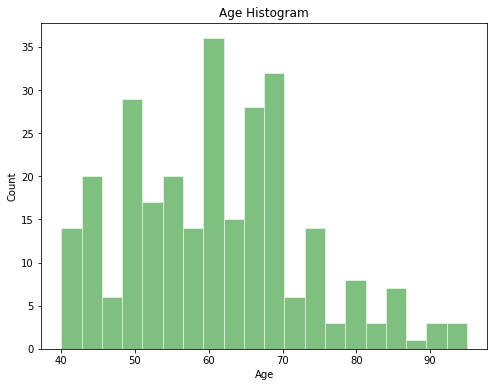

In [146]:
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Histogram')

plt.hist(df_heart.age,
        edgecolor='w',
        orientation='vertical', # แนวตั้ง vertical, แนวนอน horizontal
        bins=20, # จำนวน bar
        color='g',
        alpha=0.5)

In [110]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


([<matplotlib.patches.Wedge at 0x19378610>,
 [Text(-0.1837032655978508, 1.1352326238303256, '3'),
  Text(-0.5395342093063933, -1.0155800495225007, '1'),
  Text(0.9163525613779324, -0.694836659407161, '2')],
 [Text(-0.10383228055530697, 0.6416532221649667, '55.11%'),
  Text(-0.3049541183036136, -0.5740235062518482, '24.24%'),
  Text(0.5179384042570921, -0.39273376401274307, '20.65%')])

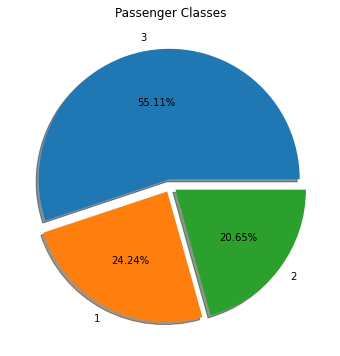

In [161]:
plt.title('Passenger Classes')

labels = df_titanic.Pclass.unique() # .unique คือ เอาแค่ตัวที่ต่างกัน Pclass.unique() -> [3 1 2]
values = df_titanic.Pclass.value_counts() # {3: 491, 1: 216, 2: 184}
explode = [0.05] * df_titanic.Pclass.unique().shape[0] # ความห่าง (0.05) * จำนวนพาย (3 ส่วน)

plt.pie(x=values,
        explode=explode,
        labels=labels,
        autopct='%.2f%%', # .2f ทศนิยม 2 ตำแหน่ง
        shadow=True)